# TODO: the example isn't great, switch to bitcoin 

----

---

---

# BLU1 - Pandas for timeseries and multi-indexing 

## 1. A bit of housekeeping before we get started

Welcome to timeseries! 

Here we will learn how to explore datasets which depend on time. As you might imagine, many processes datasts in the real world are timeseries. The stockmarket springs to mind, but also anything to do with sales or marketing, engineering processes (when will this particular turbine break, you may ask?), medical processes (what is the effect of this medication over time), and so many, many more. 

Now, timeseries are a less settled field than most things you've learned so far. There are many ways of doing things, and different schools of thought fighting to get _"followers"_. Our objective here is to avoid indoctrination, but rather to give you a bit of exposure to the super-basics of how to handle timeseries data, and making some basic but useful predictions. We will in no way try to teach you everything, but rather enough to get your hands dirty. From then on, there is the good old fashioned documentation, and hacking around. 

Speaking of covering only the basics, as you might know Neural Networks are becoming increasingly prevalent in the prediction of timeseries. While this is a very exciting topic, we've decided not to include Neural Networks in the Academy, for three main reasons:
1. We want to make sure you gain a sold technical base, on which you can then later add NNs, rather than have you "run before you can walk" 
2. Teaching NNs is slow, as to be understood correctly there are a lot of quicks and "best practice" things to know, which don't necessarily have the most scientific of basis (it's still mostly an empirical field), so they do not fit well into the "basic intuition followed by practice" approach of the Academy 
3. There are already EXCELLENT resources to learn NNs, namely [Andrew NGs course on Coursera](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjVmcT5wtbaAhXHuRQKHc2yD2wQFggpMAA&url=https%3A%2F%2Fwww.coursera.org%2Fspecializations%2Fdeep-learning&usg=AOvVaw3vIqYhrM-dZQd6HUBci4QA), which are best approached after a solid technical foundation have been laid. 

Lastly, remember that time-series are notoriously tricky to evaluate. While with "static" data we can trust a few metrics and for the most part be done with it (yay _roc auc_!), in time-series the metrics tend to be more problem specific. The thing to remember is: your problems will be extra sneaky, and you will have to be extra careful. As a corolary to this, when you think you've predicted the stockmarket... you probably haven't. 

And now, let the fun begin! 

## Pandas for Timeseries 

In this BLU we will not learn any fancy prediction stuff, but rather how to wrangle timeseries data. 

Imports: 

In [53]:
import pandas as pd 
from matplotlib import pyplot as plt 
% matplotlib inline 

#### Timestamps 

The timestamp is the most basic form of time series indexer that Pandas has. It does exactly what the name describes: marks the exact moment in which the data was collected. 

While kaggle datasets and other online challenges are normally clean "hourly" or "daily" dataset, TimeStamps are how most data is normally collected in the wild! 

An event happens, and the time of the even is dumped into a database. 

Let's examine the user visits from an old social network _([BrightKite](http://snap.stanford.edu/data/loc-brightkite.html), remember them? Oh the 2000s...)_, to see what real timeseries data looks like 

In [19]:
data = pd.read_csv('data/BrightKite.csv')

Let's take a look:

In [20]:
data.head()

,uesr,Time,Latitude,Longitude,location_id
0,4570,2008-03-21T20:36:21Z,40.013608,-105.247599,0ade7c2cf97f75d009975f4d720d1fa6c19f4897
1,12,2008-03-22T05:01:29Z,39.768753,-105.006395,7b52009b64fd0a2a49e6d8a939753077792b0554
2,12,2008-03-22T05:50:55Z,39.768057,-105.002983,fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b
3,12,2008-03-22T06:17:35Z,39.768057,-105.002983,fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b
4,12,2008-03-22T06:34:37Z,39.768057,-105.002983,fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b


Interesting. We have this `Time` column, that we can kind of parse by looking at it. 

In [21]:
data.Time.head()

0    2008-03-21T20:36:21Z
1    2008-03-22T05:01:29Z
2    2008-03-22T05:50:55Z
3    2008-03-22T06:17:35Z
4    2008-03-22T06:34:37Z
Name: Time, dtype: object

We can kind of understand this. Looks like Year, month, and day, then a T, then hours, minutes, then seconds, then a Z...  

Let's inspect a random row: 

In [22]:
print('One of the times in our dataset: %s' % data.Time.iloc[3])
print('Type of the Series (data.Time):  %s' % data.Time.dtype)
print('Type of a particular time:       %s' % type(data.Time.iloc[3]))

One of the times in our dataset: 2008-03-22T06:17:35Z
Type of the Series (data.Time):  object
Type of a particular time:       <class 'str'>


Ah, so these are just strings. How boring. 

However, pandas can do something pretty amazing with these strings: 

In [23]:
time_as_a_timestamp = pd.to_datetime(data.Time, infer_datetime_format=True)

What is it now? 

In [24]:
time_as_a_timestamp.head()

0   2008-03-21 20:36:21
1   2008-03-22 05:01:29
2   2008-03-22 05:50:55
3   2008-03-22 06:17:35
4   2008-03-22 06:34:37
Name: Time, dtype: datetime64[ns]

It is a `datetime64[ns]`, which I shall for the sake of simplicity just refer to as a TimeStamp. 

What can we do with this? Well, for one thing, extracting days, months etc is trivial:

In [25]:
time_as_a_timestamp.dt.day.head()

0    21
1    22
2    22
3    22
4    22
Name: Time, dtype: int64

Notice the nomenclature. `Series.dt.<whatever I want>`. 

And we can want [just about anything we can think of!](https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [26]:
# I'll make a little dataset so that we can see some of the results side by side
new = pd.DataFrame()
new['date'] = time_as_a_timestamp
new['day'] = new['date'].dt.day
new['month'] = new['date'].dt.month
new['year'] = new['date'].dt.year
new['hour'] = new['date'].dt.hour
new['minute'] = new['date'].dt.minute
new['second'] = new['date'].dt.second
new['day of the week'] = new['date'].dt.weekday
new['day of the week name'] = new['date'].dt.weekday_name
new['quarter'] = new['date'].dt.quarter
new['is it a leap year?'] = new['date'].dt.is_leap_year

new.head()

,date,day,month,year,hour,minute,second,day of the week,day of the week name,quarter,is it a leap year?
0,2008-03-21 20:36:21,21,3,2008,20,36,21,4,Friday,1,True
1,2008-03-22 05:01:29,22,3,2008,5,1,29,5,Saturday,1,True
2,2008-03-22 05:50:55,22,3,2008,5,50,55,5,Saturday,1,True
3,2008-03-22 06:17:35,22,3,2008,6,17,35,5,Saturday,1,True
4,2008-03-22 06:34:37,22,3,2008,6,34,37,5,Saturday,1,True


Pandas... is amazing. 

### Different date formats 

Now you may be thinking _"hang on, was that just because the strings were exactly in the way Pandas likes them?"_

It's a fair question, and the answer is No. Pandas' [`to_datetime`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) has an `infer_datetime_format` argument which is amazingly good, and can for the most part figure out what you need from it. 

Let's put it to the test: 

In [27]:
# little function to sanity check our dates
def sanity_check(dates):
    
    inferred_dates = pd.to_datetime(dates, infer_datetime_format=True)
    
    print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
    print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
    print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

In [28]:
american_dates = pd.Series(['04/05/2007',  # <-- April 5th, 2007
                            '04/13/2006', 
                            '12/27/2014'])

sanity_check(american_dates)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


In [29]:
hyphen_separated_dates = pd.Series(['04-05-2007',  # <-- April 5th, 2007
                            '04-13-2006', 
                            '12-27-2014'])

sanity_check(hyphen_separated_dates)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


In [30]:
dates_in_english = pd.Series(['April 5th, 2007',  # <-- April 5th, 2007
                            'April 13th, 2006', 
                            'December 27th, 2014'])

sanity_check(dates_in_english)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


In [31]:
european_dates = pd.Series(['05/04/2007',   # <-- April 5th, 2007
                            '13/04/2006', 
                            '27/12/2014'])

sanity_check(european_dates)

Our first day is   5,    and was infered as 4
Our first month is 4,    and was infered as 5
Our first year is  2007, and was infered as 2007


Wait... what? 

It turns out Pandas can infer lots of things, but Europe isn't it's strenght. Even though the second and third line clearly indicate that the month is in the middle (the 13'th can't be a month), it still gets confused. 

And here is where line 2 of [The Zen of Python](https://www.python.org/dev/peps/pep-0020/#id3) comes in:
> Explicit is better than implicit 

In [33]:
inferred_dates = pd.to_datetime(european_dates, dayfirst=True)

In [34]:
print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


_(disclaimer: I wanted to use [this quote](http://www.blog.indiareads.com/wp-content/uploads/2015/06/arthur-weasley-harry-potter.jpg), but the Zen of Python seemed more appropriate)_

## Resampling 

Now, back to our data. Let's try to ask some useful questions, such as 
> "_How did the use of the social network evolve over time?_"

In [35]:
data.head()

,uesr,Time,Latitude,Longitude,location_id
0,4570,2008-03-21T20:36:21Z,40.013608,-105.247599,0ade7c2cf97f75d009975f4d720d1fa6c19f4897
1,12,2008-03-22T05:01:29Z,39.768753,-105.006395,7b52009b64fd0a2a49e6d8a939753077792b0554
2,12,2008-03-22T05:50:55Z,39.768057,-105.002983,fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b
3,12,2008-03-22T06:17:35Z,39.768057,-105.002983,fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b
4,12,2008-03-22T06:34:37Z,39.768057,-105.002983,fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b


Let's start by making the timestamp the index. This is common good practice, for reasons we shall soon see. 

In [36]:
data.set_index(pd.to_datetime(data.Time, infer_datetime_format=True), 
               inplace=True) 

Also good practice once you have your datetime index, is to sort it. 

In [45]:
data.sort_index(inplace=True)

One hacky way to try to answer the question would be to see the cumulative sum over time: 

In [48]:
data['counter'] = 1

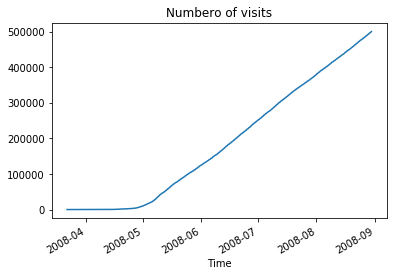

In [69]:
data['counter'].cumsum().plot()
plt.title('Numbero of visits')
plt.show()

# just getting rid of this hack so we don't carry it with us 
data.drop('counter', axis=1, inplace=True)

Useful, to a point, but we can do much better. Pandas has an excellent [resample](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) method. Think of it as a [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html), for timeseries.  

In [70]:
data.resample('d')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

What can we do with this object? 

In [73]:
# groupby day, and count 
resampled_count = data.resample('d').count()

In [74]:
resampled_count.head()

,uesr,Time,Latitude,Longitude,location_id
Time,,,,,
2008-03-21,1,1,1,1,1
2008-03-22,12,12,12,12,12
2008-03-23,5,5,5,5,5
2008-03-24,8,8,8,8,8
2008-03-25,11,11,11,11,11


-----

In [ ]:
bitcoin = pd.read_csv('data/bitcoin/coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv')

In [ ]:
pd.to_datetime(bitcoin.Timestamp, unit='s').shape

In [ ]:
df['date'] = pd.to_datetime(df['date'],unit='s')